In [1]:
import serial
import sys
import glob
import time
import serial.tools.list_ports
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display
from IPython.core.display import HTML
from IPython.display import clear_output


ser = None

def serial_ports():
     result = []
     ports = serial.tools.list_ports.comports()
     for port, desc, hwid in sorted(ports):
          comm =  "{}: {}".format(port, desc)
          result.append(comm) 
     return result

def InitSerial(port, bps = 9600, to = 0):
    global ser
    try:
        ser = serial.Serial(port, bps, timeout = to)  # open serial port
        ser.flushInput()
        ser.flushOutput()
        return ser.name
    except Exception as e:
        return 'ERR: ' + str(e)

def CloseSerial():
    return('done')
    try:
        ser.flush()
        ser.close()
        return 'done'
    except Exception as e:
        return 'ERR: ' + str(e)    

def WriteSerial(string):
    try:
        reply = ser.write(string.encode())
        return str(reply)
    except Exception as e:
        return 'ERR: ' + str(e)    

def ReadSerial():
    try:
        reply = ''
        while ser.in_waiting:
            reply = reply + ser.readline().decode()
        return reply
    except Exception as e:
        return 'ERR: ' +  str(e)
    
def SendRead(string):
    if WriteSerial(string):
        time.sleep(0.1)
        return ReadSerial()
    
updatedPortList = []

def search_for_ports():
    updatedPortList = []
    serialPortList = serial_ports()
    for x in serialPortList:
        updatedPortList.append(x[:x.index(':')])
    return updatedPortList
    
def on_value_change(change):
    with output2:
        global SerialPort
        SerialPort = change['new']
        InitSerial(change['new'],115200)
        WriteSerial('\x03')
        run_some_code()
        
def run_some_code():
    code = '''
import hub,utime
    '''
    WriteSerial('\x05')
    WriteSerial(code)
    WriteSerial('\x04')
    WriteSerial('\x03')
    
    time.sleep(1) #wait for everything to get over there and read all the replies
    words = ReadSerial()
#     print(words)
    if (">>>" in words):
        print("You are now connected to SPIKE Prime!")
    else:
        print("Error, try reconnecting or connecting to a different serial port.")

In [ ]:
rotateFaceButton = widgets.Button(
    disabled=False,
    layout = Layout(height = '40px',width = '40px',margin = '0px 0px 0px 0px',padding = '0px 0px 0px 0px'),
    icon='rotate-right' # (FontAwesome names without the `fa-` prefix)
)
rotateFace = widgets.Output()
xAxisButton = widgets.Button(
    disabled=False,
    layout = rotateFaceButton.layout,
    icon='arrow-right' # (FontAwesome names without the `fa-` prefix)
)
xAxis = widgets.Output()
yAxisButton = widgets.Button(
    disabled=False,
    layout = rotateFaceButton.layout,
    icon='arrow-up' # (FontAwesome names without the `fa-` prefix)
    )
yAxis = widgets.Output()

In [ ]:
def controls():
    setModes = '''
import hub,utime
hub.port.A.motor.mode(1)
hub.port.A.motor.brake()
hub.port.B.motor.mode(1)
hub.port.B.motor.brake()
'''
    WriteSerial('\x05')
    WriteSerial(setModes)
    WriteSerial('\x04')    

In [3]:
def installs():
    !pip install Pillow

import PIL, sys
from PIL import Image, ImageDraw, ImageFont

r=(255,0,0)
o=(255,100,0)
y=(255,255,0)
g=(0,130,50)
b=(0,50,255)
w=(255,255,255)
black=(0,0,0)
grey = (100,100,100)

In [4]:
def cubeImage(colors):
    im = PIL.Image.new(mode = "RGB", size = (210, 210), color = w)
    draw = ImageDraw.Draw(im)
        
    leftMath = lambda x, y : (64+(11*x)-(7*y),abs(-58-(13*x)-(15*y)))
    frontMath = lambda x, y : (97-(7*x)+(17*y),abs(-97-(15*x)+(3*y)))
    topMath = lambda x, y : (64+(17*x)+(11*y),abs(-58+(3*x)-(13*y)))
    rightMath = lambda x, y : (64+(11*x)-(7*y)+110.5,abs(-58-(13*x)-(15*y)+19.5))
    backMath = lambda x, y : (97-(7*x)+(17*y)-66,abs(-97-(15*x)+(3*y)+78))
    bottomMath = lambda x, y : (64+(17*x)+(11*y)-42,abs(-58+(3*x)-(13*y))+96)

    formulas = [topMath,leftMath,frontMath,rightMath,backMath,bottomMath]
    
    for i in range(len(formulas)):
        formula = formulas[i]
        for j in range(3):
            for k in range (3):
                coords = [formula(j,k),formula(j,k+1),formula(j+1,k+1),formula(j+1,k)]
                draw.polygon(coords, fill=colors[i][j*3+k], outline=black)
    
    return(im)

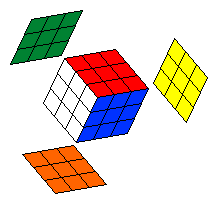

In [5]:
# display(cubeImage([[r,r,r,r,r,r,r,r,r],[w,w,w,w,w,w,w,w,w],[b,b,b,b,b,b,b,b,b],[y,y,y,y,y,y,y,y,y],[g,g,g,g,g,g,g,g,g],[o,o,o,o,o,o,o,o,o]]))